In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold, cross_validate, learning_curve, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso


from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder

In [20]:
#df = pd.read_csv("numeric_df.csv")
#df

In [21]:
df = pd.read_csv("raw_df.csv")

<AxesSubplot: >

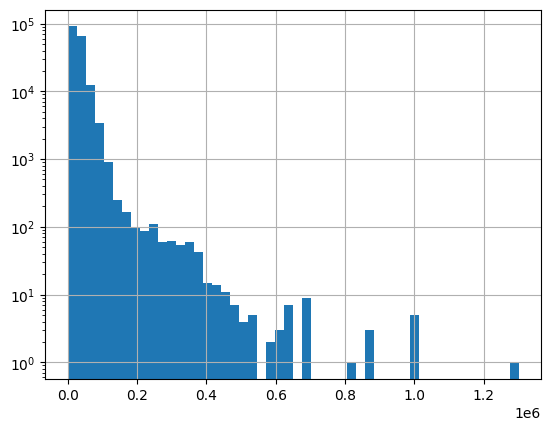

In [22]:
df.price.hist(log=True, bins=50)

In [35]:
df[df.price > 0.8e6]

,year,make,model,city,mileage,fuel,transmission,engine,drive,price,lat,long,body_type,country,luxury
15416,2009.0,mercedesbenz,slrmclaren,newyork,1379.0,gasoline,automatic,4.0,rwd,859000.0,40.7665,-73.994800,sedan,Germany,1
25765,2011.0,ferrari,599gtbfiorano,springvalley,1258.0,gasoline,manual,6.0,rwd,1299950.0,41.1064,-74.035200,sedan,Italy,1
60529,2005.0,porsche,carreragt,parsippanytroyhills,2300.0,gasoline,manual,5.0,rwd,819000.0,40.8739,-74.434600,sedan,Germany,1
112330,2017.0,mercedesbenz,amgg63,ftmyers/swflorida,4085.0,gasoline,automatic,4.0,4wd,990000.0,26.1579,-81.766548,suv,Germany,1
123473,2016.0,ferrari,f12berlinetta,greenwich,486.0,gasoline,automatic,6.3,rwd,869900.0,41.0427,-73.626200,sedan,Italy,1
130376,2017.0,mercedesbenz,gclass,naples,4085.0,gasoline,automatic,5.5,4wd,990000.0,26.1529,-81.741700,suv,Germany,1
156845,2016.0,ferrari,f12berlinetta,ranchocordova,77.0,gasoline,automatic,6.3,rwd,999900.0,38.5981,-121.215300,sedan,Italy,1
161243,2016.0,ferrari,f12berlinetta,westbloomfield,77.0,gasoline,automatic,6.3,rwd,999900.0,42.5424,-83.379300,sedan,Italy,1
161245,2016.0,ferrari,f12berlinetta,westbloomfield,77.0,gasoline,automatic,6.3,rwd,999900.0,42.5424,-83.379300,sedan,Italy,1
167038,2016.0,ferrari,f12berlinetta,westport,486.0,gasoline,automatic,6.3,rwd,869900.0,41.1434,-73.349600,sedan,Italy,1


In [23]:
df = df.drop(columns="vin")

In [24]:
X = df.drop(columns=["price"])
y = df.price

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


About target encoding
- https://contrib.scikit-learn.org/category_encoders/targetencoder.html
- https://medium.com/swlh/stop-one-hot-encoding-your-categorical-features-avoid-curse-of-dimensionality-16743c32cea4
- https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53
- https://www.kaggle.com/code/arashnic/an-overview-of-categorical-encoding-methods/notebook

In [26]:
X_train.nunique()

year               42
make               58
model            3909
city             3503
mileage         64167
fuel                5
transmission        5
engine             49
drive               5
lat              8535
long             8691
body_type           6
country            22
luxury              2
dtype: int64

In [27]:
enc = TargetEncoder(cols=['make', 'model', 'city', 'fuel', 'transmission', 'drive','country', 'body_type']).fit(X_train, y_train)
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)


In [28]:
X_train.nunique()

year               42
make               58
model            3032
city             3253
mileage         64167
fuel                5
transmission        5
engine             49
drive               5
lat              8535
long             8691
body_type           6
country            22
luxury              2
dtype: int64

In [29]:
#scaler = StandardScaler()
scaler = RobustScaler()

X_train_num = X_train
X_test_num = X_test

scaler.fit(X_train_num)

X_train.loc[:, scaler.feature_names_in_] = scaler.transform(X_train_num)
X_test.loc[:, scaler.feature_names_in_] = scaler.transform(X_test_num)

X_train

C:\Users\atruo\AppData\Local\Temp\ipykernel_252\2684887897.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, scaler.feature_names_in_] = scaler.transform(X_train_num)
C:\Users\atruo\AppData\Local\Temp\ipykernel_252\2684887897.py:10: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:, scaler.feature_names_in_] = scaler.transform(X_test_num)


,year,make,model,city,mileage,fuel,transmission,engine,drive,lat,long,body_type,country,luxury
163854,0.166667,-0.198573,0.056759,0.229425,-0.057012,0.000000,0.0,0.65,0.117905,0.502286,-0.539564,-0.095347,0.000000,0.0
22733,0.333333,0.341071,-0.946942,-0.280045,-0.275809,0.000000,0.0,0.00,0.000000,-0.011178,0.274186,0.000000,-1.000000,0.0
162652,0.166667,0.654493,-0.147077,0.721518,-0.205540,0.000000,0.0,-0.50,-0.882095,-0.764099,-3.289094,0.000000,0.000000,0.0
135676,0.333333,1.015248,1.420657,1.808174,-0.165018,0.000000,0.0,0.70,0.117905,0.329667,-0.792995,0.904653,21.832901,1.0
87454,0.500000,-0.198573,-0.456467,-0.005743,-0.431866,0.000000,0.0,-0.50,0.117905,0.178894,0.334239,0.000000,-1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-2.666667,-0.546973,-1.041927,-0.093702,0.256139,0.000000,0.0,-0.65,-0.882095,0.386495,-3.373137,0.904653,-2.257447,0.0
103694,-2.000000,-0.198573,0.133942,-0.575364,1.460076,2921.006096,0.0,0.50,0.117905,-0.535181,-3.266603,-0.095347,0.000000,0.0
131932,0.333333,0.341071,0.821000,0.456017,-0.050206,0.000000,0.0,1.70,0.089688,-3.742201,-0.215688,0.904653,-2.257447,0.0
146867,-1.000000,1.015248,0.813101,-0.365610,0.939243,0.000000,0.0,0.70,0.117905,-0.215832,-2.048580,-12.056193,21.832901,1.0


In [30]:
X_train.corrwith(y_train)

year            0.360472
make            0.686765
model           0.789985
city            0.434519
mileage        -0.396879
fuel            0.026944
transmission    0.078931
engine          0.251785
drive           0.278422
lat            -0.050983
long            0.065436
body_type       0.105425
country         0.395763
luxury          0.321570
dtype: float64

We see that `lat`, `long`, `fuel`, and `transmission` all have fairly low correlation with the target feature. So for the sake of performance, we drop these features. 

In [31]:
dtr = DecisionTreeRegressor(max_depth=100).fit(X_train, y_train)

dtr.score(X_test, y_test)

0.8938937824075947

In [32]:
X_train = X_train.drop(columns=["lat", "long", "fuel", "transmission"])
X_test = X_test.drop(columns=["lat", "long", "fuel", "transmission"])

#X_train = X_train.drop(columns=["fuel", "transmission"])
#X_test = X_test.drop(columns=["fuel", "transmission"])


In [33]:
dtr = DecisionTreeRegressor(max_depth=100).fit(X_train, y_train)

dtr.score(X_test, y_test)

0.903750615363979

In [38]:
rfr = RandomForestRegressor(max_depth=25, n_estimators=50, verbose=1, max_features="sqrt").fit(X_train, y_train)

rfr.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   22.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


0.933520523320031

In [144]:
svr = LinearSVR(loss="squared_epsilon_insensitive", dual=False).fit(X_train, y_train)

svr.score(X_test, y_test)

0.7601174639262387

In [145]:
sgd = SGDRegressor().fit(X_train, y_train)

sgd.score(X_test, y_test)

0.7351173624335698

In [135]:
gbr = GradientBoostingRegressor(n_estimators=50).fit(X_train, y_train)

gbr.score(X_test, y_test)

0.8553798661991293

In [146]:
br = BaggingRegressor(n_estimators=50).fit(X_train, y_train)

br.score(X_test, y_test)

0.9304383751763059

In [147]:
abr = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10), n_estimators=50).fit(X_train, y_train)

abr.score(X_test, y_test)

0.900945577001316

In [148]:
knnr = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)

knnr.score(X_test, y_test)

0.8801832959006067

In [149]:
mlpr = MLPRegressor(learning_rate_init=0.1).fit(X_train, y_train)

mlpr.score(X_test, y_test)

0.8712520562380053

In [150]:
#vr = VotingRegressor([("dtr", dtr), ("rfr", rfr), ("gbr", gbr), ("br", br), ("abr", abr), ("knnr", knnr), ("mlpr", mlpr)])

In [151]:
#vr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.3s finished


VotingRegressor(estimators=[('dtr', DecisionTreeRegressor(max_depth=100)),
                            ('rfr',
                             RandomForestRegressor(max_depth=25,
                                                   max_features='sqrt',
                                                   n_estimators=50,
                                                   verbose=1)),
                            ('gbr', GradientBoostingRegressor(n_estimators=50)),
                            ('br', BaggingRegressor(n_estimators=50)),
                            ('abr',
                             AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10))),
                            ('knnr', KNeighborsRegressor(n_neighbors=3)),
                            ('mlpr', MLPRegressor(learning_rate_init=0.1))])

In [153]:
#vr.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


0.9237998634233857

In [19]:
def PolynomialRegressor(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(**kwargs))

In [20]:
pr = PolynomialRegressor(degree=2)

pr.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [87]:
pr.score(X_test, y_test)

0.8250720046428597

In [16]:
# overfitting
model = PolynomialRegressor(1)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="r2",
    n_jobs = -1,
    verbose=3
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

print(train_mean)
print(test_mean)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R-Squared")
plt.legend(loc="best")

plt.show()

NameError: name 'PolynomialRegressor' is not defined

#### Comparing Algorithms

In [1]:
models = []

models.append(('DTR', DecisionTreeRegressor(max_depth = 50)))
models.append(('LSVR', LinearSVR(C=10, loss = "squared_epsilon_insensitive", dual = False)))
models.append(('KNNR', KNeighborsRegressor(n_neighbors = 3, n_jobs=-1)))
models.append(('RFR', RandomForestRegressor(max_depth = 50, n_estimators = 50, n_jobs=-1)))
models.append(('ABR', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), n_estimators=50)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=50)))
models.append(('BR', BaggingRegressor(n_estimators=50, n_jobs=-1)))
models.append(('NNR', MLPRegressor(learning_rate_init=0.1)))
models.append(('SGDR', SGDRegressor()))

r2_results = []
mse_results = []
names = []
rkfold = RepeatedKFold(n_splits=3, n_repeats=3, random_state=42)

for name, model in models:
    cv_results = cross_validate(model, X_train, y_train, cv=rkfold, scoring=('r2', "neg_mean_squared_error"), n_jobs = -1)
    r2_results.append(cv_results['test_r2'])
    mse_results.append(cv_results['test_neg_mean_squared_error'])
    names.append(name)
    print("%s \tR-Squared: %f (%f), \t Negative MSE: %f (%f)" % (name, cv_results['test_r2'].mean(), cv_results['test_r2'].std(), cv_results['test_neg_mean_squared_error'].mean(), cv_results['test_neg_mean_squared_error'].std()))

NameError: name 'DecisionTreeRegressor' is not defined

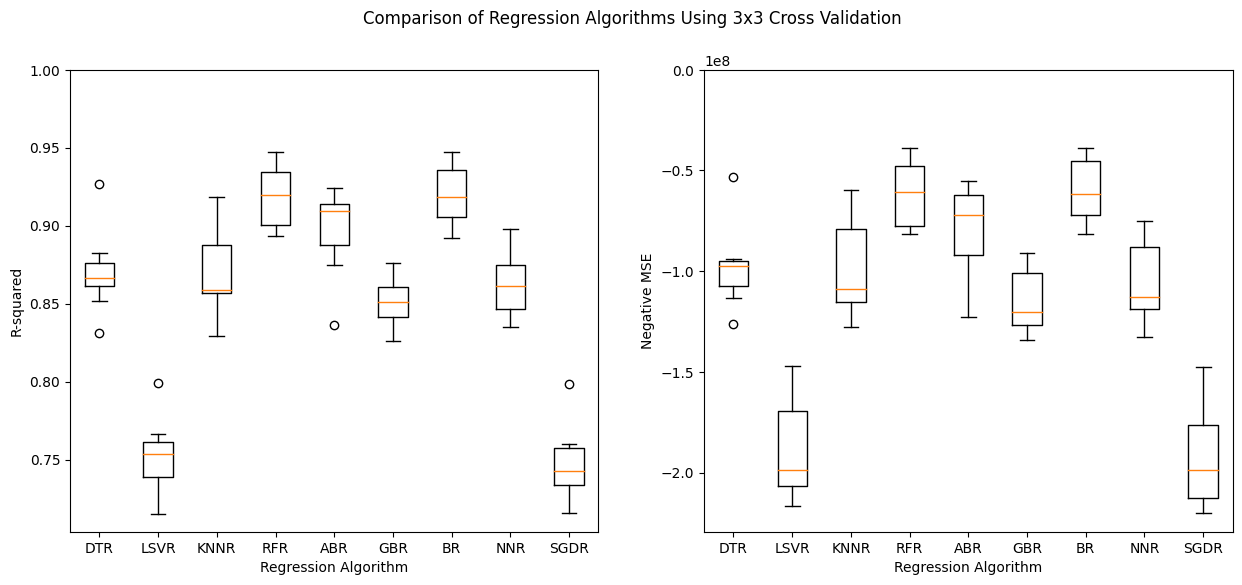

In [169]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Comparison of Regression Algorithms Using 3x3 Cross Validation')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(r2_results)
ax2.boxplot(mse_results)
ax1.set_xticklabels(names)
ax1.set_xlabel("Regression Algorithm")
ax1.set_ylabel("R-squared")
ax2.set_xticklabels(names)
ax2.set_xlabel("Regression Algorithm")
ax2.set_ylabel("Negative MSE")
ax1.set_ylim(top=1)
ax2.set_ylim(top=0)
plt.show()

In [16]:
params = {
    "n_estimators": [50,100,150],
    "max_depth": [50,100,150],
    "min_samples_split": [1, 5, 10, 15, 20],
    "min_samples_leaf": [1, 5, 10, 15, 20],
    "max_features": [None, "sqrt", "log2"],
    "bootstrap": [True, False]
}

rfr_gc = RandomizedSearchCV(RandomForestRegressor(random_state=42, verbose=1), param_distributions = params, n_jobs = -1, cv=3, scoring = "r2", verbose= 1)

In [17]:
rfr_gc.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.4s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(random_state=42, verbose=1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 100, 150],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [50, 100, 150]},
                   scoring='r2', verbose=1)

In [21]:
print(rfr_gc.best_params_)
#print(rfr_gc.best_scores_)
best_rfr = rfr_gc.best_estimator_

{'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [20]:
best_rfr.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


0.926080828086312

In [21]:
params={
        "n_estimators" : [100, 200]
}

br_gc = GridSearchCV(
    BaggingRegressor(n_jobs = -1, random_state = 42),
    param_grid=params,
    scoring='r2', 
    n_jobs = -1,
    cv=3,
    verbose=1)

In [22]:
br_gc.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


MemoryError: 

In [104]:
print(br_gc.best_params_)
print(br_gc.best_score_)
best_br = br_gc.best_estimator_

{'n_estimators': 100}
0.9225452852651804
